In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train = pd.read_csv('C:/Users/gokul/Documents/Projects/human Activity/train.csv')
test = pd.read_csv('C:/Users/gokul/Documents/Projects/human Activity/test.csv')

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
train.shape

(7352, 563)

In [12]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [13]:
train.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

In [19]:
X_train = train.loc[:,train.columns != 'Activity']
y_train = train.loc[:,'Activity']
X_test = test.loc[:,test.columns != 'Activity']
y_test = test.loc[:,'Activity']

In [66]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)
rank_classifier.fit(X_train,y_train)
print(type(rank_classifier))
Predictions = rank_classifier.predict(X_test)


<class 'sklearn.tree.tree.DecisionTreeClassifier'>


In [67]:
Predictions.shape

(2947,)

In [68]:
Predictions[:10]

array(['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'STANDING', 'STANDING', 'STANDING', 'STANDING', 'SITTING'], dtype=object)

In [69]:
y_test[:10].T

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
5    STANDING
6    STANDING
7    STANDING
8    STANDING
9    STANDING
Name: Activity, dtype: object

In [70]:
Predictions_train = rank_classifier.predict(X_train)
accuracy_score(y_true = y_train, y_pred = Predictions_train)

0.95212187159956474

In [71]:
accuracy_score(y_true = y_test, y_pred = Predictions)


0.85816084153376315

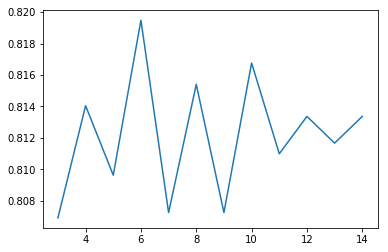

Optimal K value is 6
Accuracy of Optimum K value is 0.8194774346793349


In [50]:
from sklearn import neighbors
Accuracy_KNN = np.array([])
rangeli = np.array(list(range(3,15)))
for i in rangeli:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predicted_knn = knn.predict(X_test)
    Accuracy = accuracy_score(y_true = y_test, y_pred = predicted_knn)
    Accuracy_KNN = np.append(Accuracy_KNN, Accuracy)

plt.plot(rangeli, Accuracy_KNN)
plt.show()
print("Optimal K value is {}".format(rangeli[np.argmax(Accuracy_KNN)]))
print("Accuracy of Optimum K value is {}".format(np.max(Accuracy_KNN)))

In [51]:
np.max(Accuracy_KNN)

0.81947743467933487

In [52]:
np.amax(Accuracy_KNN)

0.81947743467933487

In [53]:
np.argmax(Accuracy_KNN)

3

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
Accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
Accuracy

0.77027485578554467

In [79]:
from sklearn import linear_model

LRmod = linear_model.LogisticRegression()
LRmod.fit(X_train,y_train)
pred = LRmod.predict(X_test)
accuracy_score(y_true = y_test, y_pred = pred)

0.96131659314557172

In [81]:
y_test[500:505]

500    SITTING
501    SITTING
502    SITTING
503    SITTING
504    SITTING
Name: Activity, dtype: object

In [82]:
pred[500:505]

array(['SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING'], dtype=object)

In [83]:
pred = LRmod.predict(X_train)
accuracy_score(y_true = y_train, y_pred = pred)

0.99115886833514688